##### Grading Feedback Cell


# IST 718: Big Data Analytics

- Professor: Willard Williamson <wewillia@syr.edu>
- Faculty Assistant: Vidushi Mishra <vmishr01@syr.edu>
- Faculty Assistant: Pranav Kottoli Radhakrishna <pkottoli@syr.edu>
## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- Do not modify cells marked as grading cells or marked as do not modify.
- Before submitting your work, remember to check for run time errors with the following procedure:
`Runtime `$\rightarrow$ Factory reset runtime followed by Runtime $\rightarrow$ Run All.  All runtime errors will result in a minimum penalty of half off.
- Google Colab is the official class runtime environment so you should test your code on Colab before submission.
- All plots shall include descriptive title and axis labels.  Plot legends shall be included where possible.  Unless stated otherwise, plots can be made using any Python plotting package.  It is understood that spark data structures must be converted to something like numpy or pandas prior to making plots.  All required mathematical operations, filtering, selection, etc., required by a homework question shall be performed in spark prior to converting to numpy or pandas.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- We reserve the right to take points off for operations that are extremely inefficient or "heavy weight".  This is a big data class and extremely inefficient operations make a big difference when scaling up to large data sets.  For example, the spark dataframe collect() method is a very heavy weight operation and should not be used unless it there is a real need for it.  An example where collect() might be needed is to get ready to make a plot after filtering a spark dataframe.
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- Only use spark, spark machine learning, spark data frames, RDD's, and map reduce to solve all problems unless instructed otherwise.
- Your notebook must run from start to finish without requiring manual input by the graders.  For example, do not mount your personal Google drive in your notebook as this will require graders to perform manual steps.  In short, your notebook should run from start to finish with no runtime errors and no need for graders to perform any manual steps.


## Note that this notebook is expected to run in the Google Colab environment.  All grading for this assignment will take place exclusively in Google Colab.

The following cell reads the data files needed for this homework from github and stores it on your local colab instance.


In [1]:
%%bash
# Do not change or modify this file
# Need to install pyspark
# if pyspark is already installed, will print a message indicating pyspark already isntalled
pip install pyspark

# Download the data files from github
# If the data file does not exist in the colab environment
if [[ ! -f ./quotes_by_char.csv ]]; then 
   # download the data file from github and save it in this colab environment instance
   wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/quotes_by_char.csv  
fi

  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=accf5c5c227a68255b8c2425499d948af2e02c01194047e56f9c84fb1645c29b
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


--2020-11-09 21:09:54--  https://raw.githubusercontent.com/wewilli1/ist718_data/master/quotes_by_char.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4352265 (4.2M) [text/plain]
Saving to: ‘quotes_by_char.csv’

     0K .......... .......... .......... .......... ..........  1% 1.96M 2s
    50K .......... .......... .......... .......... ..........  2% 4.04M 2s
   100K .......... .......... .......... .......... ..........  3% 11.1M 1s
   150K .......... .......... .......... .......... ..........  4% 14.8M 1s
   200K .......... .......... .......... .......... ..........  5% 6.42M 1s
   250K .......... .......... .......... .......... ..........  7% 29.4M 1s
   300K .......... .......... .......... .......... ..........  8% 30.4M 1s
   350K .......... .......

William Shakespeare is considered one of the greatest playwrights in the English language. He is attributed with 38 plays, 154 sonnets, and other works. Even 400 years later, his writings are still be studied in most high schools and colleges in the US and elsewhere. Shakespeare’s complete works are available online at http://shakespeare.mit.edu/.  We will be using a data set which has Shakespeare character quotes.  A lot of people are fascinated by the characters in the Shakespeare plays.  The first first part of the assignment is to create a Shakespeare character recommender system which is capable of recommending new characters which are similar to a speicific character of interest.  We will also explore using PCA inference to find important words in character quotes.  In the second part of the assignment we will use K-Means clustering to try and find one or more character insights. 

# Part 1: Shakespeare Recommender System

# Question 1 (10 pts)
Read the quotes_by_char.csv file into a spark dataframe named `quotes_by_char_df`.  Drop the `Unnamed` column.  Transform the character column such that all character names are lower case.

In [2]:
# Your code here
%matplotlib inline
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession \
  .builder \
  .master("local[*]")\
  .config("spark.memory.fraction", 0.8) \
  .config("spark.executor.memory", "12g") \
  .config("spark.driver.memory", "12g")\
  .config("spark.memory.offHeap.enabled",'true')\
  .config("spark.memory.offHeap.size","12g")\
  .getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# read the csv file
quotes_by_char_df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("quotes_by_char.csv")
# drop the unnamed column
quotes_by_char_df = quotes_by_char_df.drop('_c0')
# convert contents to lower case
from pyspark.sql.functions import lower, col
quotes_by_char_df = quotes_by_char_df.withColumn('character', lower(col('character')))

In [3]:
# grading cell do not modify
display(quotes_by_char_df.toPandas().head())

,character,all_quotes
0,& c,"Well met, Master Ford."
1,a lord,"Sir, it was I."
2,a patrician,This man has marr'd his fortune. You do the no...
3,a player,So please your lordship to accept our duty. I ...
4,aaron,"Now climbeth Tamora Olympus' top, Safe out of ..."


##### Grading Feedback Cell Do Not Modify

# Question 2 (10 pts)
Create a spark pipeline named `pipe_pca_1` which performs Principal Component Analysis (PCA) on `chars_df`.  Use `pipe_pca_1` to create a new dataframe named `chars_pca_df`.  Analyze the resulting number of TF-IDF data rows and columns in your data.  Add code to the specially marked code cell below which prints the number of rows and cols in your TF-IDF data.  Using the analysis for the number of rows and cols in the data, explicitly set the K parameter in the spark PCA object equal to the maximum number of principal components.  Your overall solution should use sound data science techniques as outlined in lecture for making TF-IDF and PCA score calculations. We will be looking closely at how these calculations are made during the grading process.

In [4]:
# your code to create chars_pca_df here
import requests
import numpy as np
from pyspark.ml import Pipeline
from pyspark.ml.feature import IDF, RegexTokenizer, StopWordsRemover, CountVectorizer, StandardScaler, PCA

# obtain the stop words from a website
stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()

tk = RegexTokenizer(minTokenLength=2)\
  .setGaps(False)\
  .setPattern("\\p{L}+")\
  .setInputCol("all_quotes")\
  .setOutputCol("words")
sw = StopWordsRemover().setStopWords(stop_words).setCaseSensitive(False).setInputCol("words").setOutputCol("filtered")
# given the time limit requirement, one needs to set the vocabsize to 3500
cv = CountVectorizer(minTF=4., minDF=10., vocabSize=3500).setInputCol('filtered').setOutputCol('tf')
idf = IDF(inputCol='tf', outputCol='tfidf')
center = StandardScaler(withMean=True, withStd=False, inputCol='tfidf', outputCol='centered_tfidf')
pca = PCA(k=500, inputCol='centered_tfidf', outputCol='scores')

pipe_pca_1 = Pipeline(stages=[tk, sw, cv, idf, center, pca]).fit(quotes_by_char_df)
chars_pca_df = pipe_pca_1.transform(quotes_by_char_df)

In [5]:
# your code here to print the number of rows and cols in the TF-IDF data in chars_pca_df here
df_Shape = np.array(chars_pca_df.select('tfidf').rdd.map(lambda x: x['tfidf']).collect())
print("The shape of the chars_pca_df:", df_Shape.shape)

The shape of the chars_pca_df: (966, 3500)


In [6]:
# grading cell - do not modify
display(chars_pca_df.toPandas().head())

,character,all_quotes,words,filtered,tf,tfidf,centered_tfidf,scores
0,& c,"Well met, Master Ford.","[well, met, master, ford]","[met, master, ford]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-6.303973377450328, -4.937697269376542, -4.06...","[17.971293117267532, 1.3343809470125965, -2.30..."
1,a lord,"Sir, it was I.","[sir, it, was]",[sir],"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-6.303973377450328, -4.937697269376542, -4.06...","[17.971293117267532, 1.3343809470125965, -2.30..."
2,a patrician,This man has marr'd his fortune. You do the no...,"[this, man, has, marr, his, fortune, you, do, ...","[man, marr, fortune, nobler, ay, burn]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-6.303973377450328, -4.937697269376542, -4.06...","[17.971293117267532, 1.3343809470125965, -2.30..."
3,a player,So please your lordship to accept our duty. I ...,"[so, please, your, lordship, to, accept, our, ...","[lordship, accept, duty, think, twas, soto, ho...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-6.303973377450328, -4.937697269376542, -4.06...","[17.971293117267532, 1.3343809470125965, -2.30..."
4,aaron,"Now climbeth Tamora Olympus' top, Safe out of ...","[now, climbeth, tamora, olympus, top, safe, ou...","[climbeth, tamora, olympus, safe, fortune, sho...","(16.0, 18.0, 13.0, 12.0, 5.0, 4.0, 0.0, 8.0, 8...","(19.21400365250883, 25.00922811532751, 16.3465...","[12.910030275058501, 20.071530845950967, 12.28...","[-37.15262632507068, -11.085169746958968, 5.10..."


##### Grading Feedback Cell

# Question 3 (10 pts):
Analyze the PCA data in `chars_pca_df`.  Create scree and cumulative variance explained plots.  Assuming you were trying to reduce the number of columns to train a machine learning model, how many princiapal components would you pick such that the number of data columns is reduced from the original data set but you still capture a reasonable amount of variance in the data.  Describe in words the number of principal components you would choose and how you arrived at that number of components.

Text(0, 0.5, 'Cumulative Sum of Variance Explained')

<Figure size 432x288 with 0 Axes>

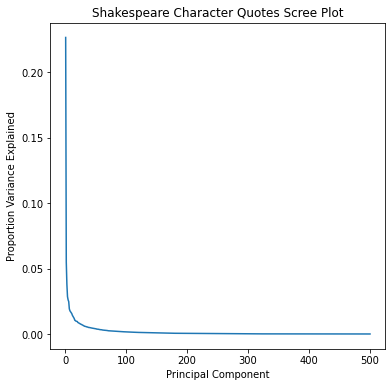

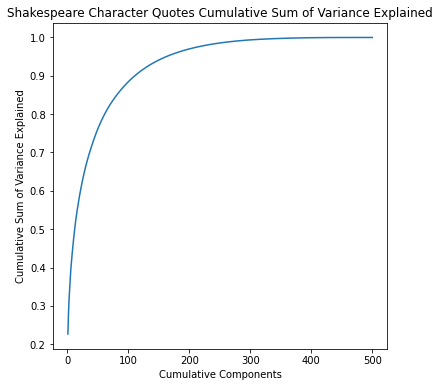

In [7]:
# your code here
import matplotlib.pyplot as plt

plt.figure()
explained_var = pipe_pca_1.stages[-1].explainedVariance
cum_sum = np.cumsum(explained_var)

# create scree plot:
fig, ax = plt.subplots(1,1, figsize =(6, 6))
plt.plot(np.arange(1, len(explained_var)+1), explained_var)
plt.title("Shakespeare Character Quotes Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion Variance Explained")

# create cumulative plot:
fig, ax = plt.subplots(1,1, figsize =(6, 6))
plt.plot(np.arange(1, len(explained_var)+1), cum_sum)
plt.title("Shakespeare Character Quotes Cumulative Sum of Variance Explained")
plt.xlabel("Cumulative Components")
plt.ylabel("Cumulative Sum of Variance Explained")

##### Grading Feedback Cell

Your explanation here: <br>
Personally, I would like to set the number of principal components as 150 since the result would be approximately 0.98, which is a satisfactory result. With the increase of the number of principle components, the increase of marginal variance gradually slows down. Besides, having more irrelevent or less important princiapal components inside the model will slow down the running time significantly. Therefore, one can change the k number as 150 in the pca transformer and then re-run the model to get the most important princiapal components.

##### Grading Feedback Cell

# Question 4 (20 pts):
In this question your will write code which makes recommendations on new characters to study based on a specific character that a Shakespeare fan likes.

Create a function named get_nearest_chars that takes 2 arguments: char and num_nearest_chars. The char arg is a string which defines the character for which we are interested in finding similar characters. The num_nearest_chars arg is an integer that defines the total number of nearest characters which we want included in the return list. The get_nearest_chars function shall perform all of its internal operations in spark and return a python list containing a string corresponding to each of the nearest characters defined by num_nearest_chars. Compute the list of characterss which are closest to the char arg using L2 Euclidian distance. 

Hint: Start by creating a new pipe named pipe_pca_2 that is the same as pipe_pca_1 except set K equal to 2 when instantiating the PCA object. We are essentially fixing the number of PCA components to 2 so that we will limit the Euclidian distance to 2 dimensions for this problem. 

Your get_nearest_chars function should rigorously error check input data to verify that the user is not making illegal requests. We plan on trying your code against secret tests which verify your error checking to make the challenge more interesting. You are free to break the problem up into as many sub functions as you wish but you must implement get_nearest_chars as the top level entry point to your code.

In [8]:
# your code here
from pyspark.sql import types
from pyspark.sql import functions as fn

# create a fucntion to measure the distance between the input character and the other
def l2_dist(c1, c2):    
    return float(np.sqrt((c1 - c2).T.dot((c1 - c2))))
l2_dist_udf = fn.udf(l2_dist, types.FloatType())
spark.sql("SET spark.sql.crossJoin.enabled=TRUE")

# obtain all the available character names
all_character = quotes_by_char_df.select('character').rdd.map(lambda row : row[0]).collect()

def if_subset(ls):
    if set(ls).issubset(all_character) is True:
        return(True)
    else:
        return(False)

# create a new pipeline which changed the k to 2
pca_fn = PCA(k=2, inputCol='centered_tfidf', outputCol='scores')
pipe_pca_2 = Pipeline(stages=[tk, sw, cv, idf, center, pca_fn]).fit(quotes_by_char_df)
df = pipe_pca_2.transform(quotes_by_char_df)

def get_nearest_chars(char, num_nearest_chars):
  # change all the elements to lowercase; remove whitespcaes and empty value
  if type(char) == str and type(num_nearest_chars) == int:
    char = [char.strip().lower().replace(" ", '')]
    if if_subset(char) == True:
      if num_nearest_chars > 0 and num_nearest_chars < len(all_character)-1:
        result = df.where(df['character'] == char[0]).select(fn.col("scores").alias('char_scores')).\
            join(df).withColumn('dist', l2_dist_udf('scores', 'char_scores')).\
            select("character").orderBy(fn.asc("dist")).limit(num_nearest_chars+1).rdd.flatMap(lambda x: x).collect()[1:]
      else: 
        result = "The number of nearest character should be greater than 0 or less than 965."
    else:
      result = "The character should be inside the available list."
  else:
    result = "Wrong input type."
  return(result)

In [9]:
# grading cell - do non modify
print(get_nearest_chars('romeo', 5))
print(get_nearest_chars('juliet', 5))

['juliet', 'king henry iv', 'mark antony', 'pericles', 'duke vincentio']
['romeo', 'mark antony', 'duke vincentio', 'king henry iv', 'titus andronicus']


##### Grading Feedback Cell

# Question 5 (10 pts):
Using PCA score data from PC1 and PC2, create a 2 dimensional character visualization plot which shows what characters are similar to the `juliet` character.  Your plot should clearly label the characters closest to juliet but not contain so many labels that it is hard or impossible to interpret.  Filter the data as needed to make a nice visualization which is easy to read and interpret.  You can use pipe_pca_2 for this question.

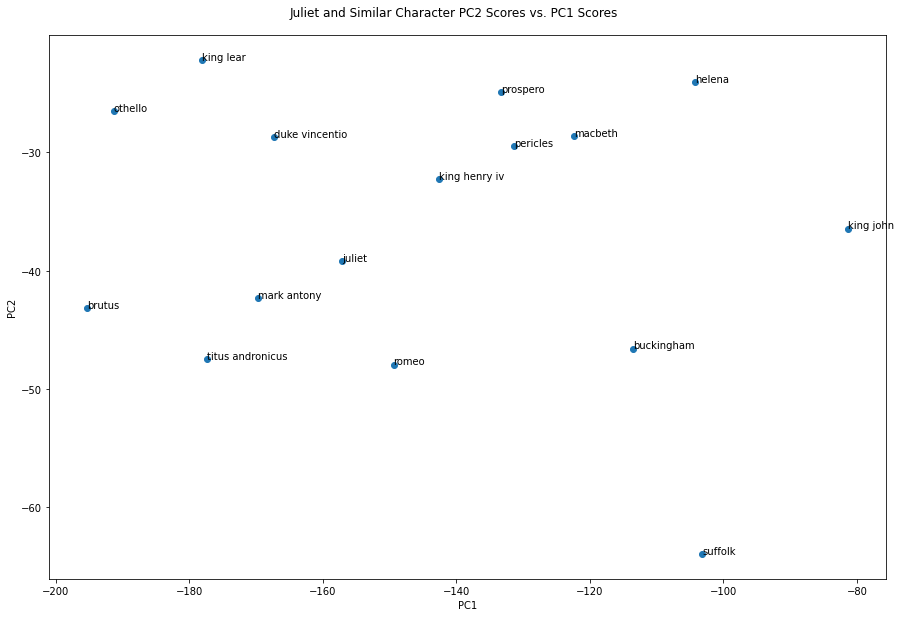

None

In [10]:
# your code here
import pandas as pd

# extract the pc1 and pc2 from the "scores" column
character_names = np.array(df.select('character').rdd.map(lambda x: x['character']).collect())
X = np.array(df.select('scores').rdd.map(lambda x: x['scores']).collect())

# setting index to filter the un-wanted points
idx = np.logical_and(X[:, 0] > -200, X[:, 0] < -80)
Y = X[idx]
character_name = character_names[idx]

idx = np.logical_and(Y[:, 1] > -70, Y[:, 1] < -20)
Y = Y[idx]
character_name = character_name[idx]

# now plot the data
fig, ax = plt.subplots(1,1, figsize =(15,10))
ax.scatter(Y[:,0], Y[:,1])
fig.suptitle("Juliet and Similar Character PC2 Scores vs. PC1 Scores", y=.92)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

for i, txt in enumerate(character_name):
    ax.annotate(txt, (Y[i,0], Y[i,1]))
    
display(plt.show())

##### Grading Feedback Cell

# Question 6 (10 pts)
Perform an inference analysis on the 10 most and 10 least important words in the data set as defined by the absolute value of the PC1 loading vector coefficients.  Present the data by loading and printing 2 Pandas data frames containing the 10 most important words and 10 least important words named `most_imp_df` and `least_imp_df` respectively.  The data frames shall have 2 columns named `word` and `loading`.  Provide a written interpretation of the word importances.  You can use pipe_pca_2 for this question.

In [11]:
# your code here
pc1 = pipe_pca_2.stages[-1].pc.toArray()[:, 0].tolist()
vocabulary = pipe_pca_2.stages[2].vocabulary
pc_loading = pd.DataFrame([vocabulary, pc1]).T.rename(columns={0: 'word', 1: 'loading'})
pc_loading = pc_loading.apply({'word': lambda x: x, 'loading': np.abs}, axis=0)

most_imp_df = pc_loading.sort_values('loading', ascending=False).head(10)
least_imp_df = pc_loading.sort_values('loading', ascending=False).tail(10)

In [12]:
# grading cell - do not modify
display(most_imp_df)
display(least_imp_df)

,word,loading
0,thou,0.294449
1,thy,0.21082
3,thee,0.193043
2,shall,0.170829
8,ll,0.153766
4,good,0.149805
9,let,0.144807
7,come,0.139972
11,man,0.139624
18,king,0.135071


,word,loading
1948,slight,0
1947,suspicion,0
1946,ago,0
1945,reach,0
1944,grew,0
1942,pomp,0
1941,key,0
1940,petty,0
1939,cheque,0
3499,sixteen,0


Your explanation here<br>
The first loading vector is also called the first principle component which represents the variances. Namely, the first principal component represents the direction which captures the most variance in the data. The higher the number of loading for the first principle component is, the more important the corresponding word will be. 
<br>
In this case, the word "thou" is the most important word in this dataset. Word like 'king' is also in the top 10 important word list, meaning that the author must wrote a lots 'king' related plot in his stories. There is one limitation in this case, the word like "thy" should be removed as a stop word. However, those words are old english style. Therefore, the model english stop word transformer failed to remove those old english styled words. The result might be influenced by this limitation.
<br> For the 10 least important list, there are many words assigned as having '0' loading value, indicating that those words are the least important tokens in the dataset. In the output, only 10 out of them have been dislayed.

##### Grading Feedback Cell

# Part 2: K-Means Clustering

# Question 7 (10 pts)
Read the python K-means [docs](https://spark.apache.org/docs/latest/ml-clustering.html#k-means).  Use the `chars_pca_df` from question 2 above and compute K-Means silhouette scores for K = 2 through 6 on the PCA score data. You are free to create a new dataframe to reorganize the PCA data or regenerate the data in chars_pca_df if you wish.   Train your model on each K 3 times to find the lowest silhouette score.  The silhouette score is a measure of within cluster variation.  Remember that because K-Means starts out with random cluster assignments, it is not guaranteed to find a global minima so you should make multiple runs to find the lowest score.  Plot the silhouette scores vs. K and report the lowest silhouette score from the plot. If the process of finding the lowest silhouette scores is taking too much time, reduce the number of PCA score columns such that you capture a reasonable amount of variance but complete training in a more reasonable amount of time.  The work you did in question 3 above could be useful here.

The highest silhouette score is 0.6052440980983531
The lowest silhouette score is 0.45519026757972453


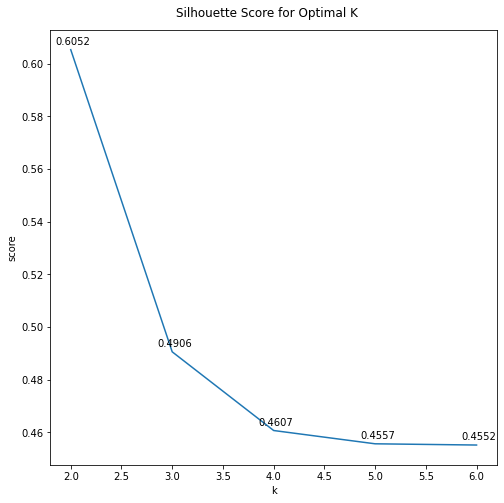

In [13]:
# your code here
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import Normalizer
from pyspark.ml.evaluation import ClusteringEvaluator

# Accoring to the result of question 3 and the time limit requirement, one can set the k as 100
evaluator = ClusteringEvaluator()
pca_kmean = PCA(k=150, inputCol='centered_tfidf', outputCol='scores')
norm = Normalizer(inputCol="scores", outputCol="features", p=2.0)
norm_df = Pipeline(stages=[tk, sw, cv, idf, center, pca_kmean, norm]).fit(quotes_by_char_df).transform(quotes_by_char_df)
scores = []

for k in range(2, 7):
  best_score = 0
  kmean = KMeans(k=k, featuresCol='features', predictionCol='prediction', seed = 1)
  for iter in range(0, 3):
    result = kmean.fit(norm_df).transform(norm_df)
    current = evaluator.evaluate(result)

    if current > best_score:
      best_score = current
    else:
      continue
  scores.append(best_score)

fig, ax = plt.subplots(1,1, figsize =(8,8))
ax.plot(range(2,7), scores)

for i, v in enumerate(scores):
  ax.annotate(str(round(v, 4)), xy=(i+1.9,v), xytext=(-5, 5), textcoords='offset points')

fig.suptitle("Silhouette Score for Optimal K", y=.92)
ax.set_xlabel('k')
ax.set_ylabel('score')

print("The highest silhouette score is", max(scores))
print("The lowest silhouette score is", min(scores))

##### Grading Feedback Cell

# Question 8 (20 pts)
Perform K-Means clustering using the `chars_pca_df` and plot the results using a scatter plot.  Color the points by cluster assignment.  You are allowed to create a new dataframe from chars_pca_df or regenerate the data if you wish.  The work you did in question 7 above can be applied directly to this problem.  The goal of this question is to try to find an interesting insight about the Shakespeare characters.  For example, perhaps you spot one or more outlier characters that stands apart from the rest of the characters in the cluster.  An example of this is how IST-718 and IST-719 stand out from the rest of the cluster in the unsupervised learning notebook presented in class (though that plot did not use K-Means clustering, it only used PCA).  Note that in the previous example, I am only providing an example of 1 type of interesting insight.  When you find something interesting, add labels to the points of interest so that the reader of your plot can understand the insight.  Provide an explanation of your insight.  This question is completely open ended and you are free to generate the clusters any way you see fit as long as you use K-Means and your methodology follows good data science practices.  You can plot the observation data in 2 dimensions by using PC1 and PC2 as the X and Y coordinates.  Your plot should be easy to read and not overly cluttered.  This question will be graded on your level of effort in comparison to what insights other students in the class find.

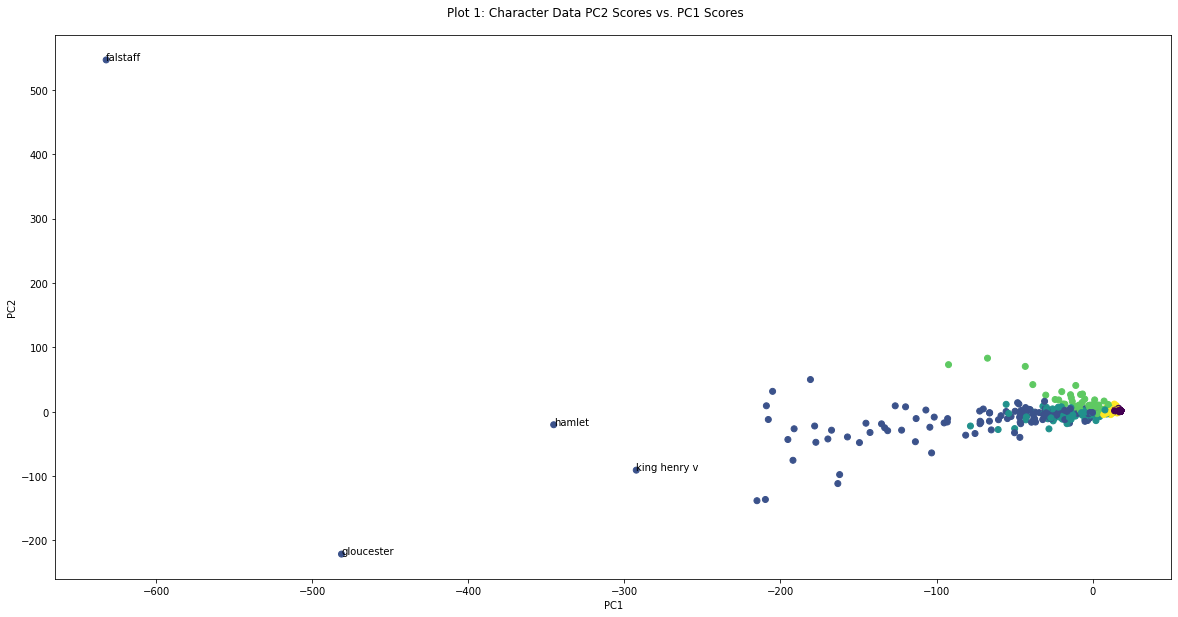

None

In [14]:
# your code here
kmean = KMeans(k=5, featuresCol='features', predictionCol='prediction')
cluster_df = Pipeline(stages=[kmean]).fit(norm_df).transform(norm_df)

char_names = np.array(cluster_df.select('character').rdd.map(lambda x: x['character']).collect())
loadings = np.array(cluster_df.select('scores').rdd.map(lambda x: x['scores']).collect())
predict_result = np.array(cluster_df.select('prediction').rdd.map(lambda x: x['prediction']).collect())

# now plot the data
# plot 1: general view
fig, ax = plt.subplots(1,1, figsize =(20, 10))

# extract the outliers
outlier_idx = loadings[:, 0] < -250
Y = loadings[outlier_idx]
outlier_name = char_names[outlier_idx]
outlier_predict = predict_result[outlier_idx]

scatter = ax.scatter(loadings[:,0], 
                     loadings[:,1], 
                     c = predict_result)
fig.suptitle("Plot 1: Character Data PC2 Scores vs. PC1 Scores", y=.92)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

for i, txt in enumerate(outlier_name):
    ax.annotate(txt, (Y[i,0], Y[i,1]))
    
display(plt.show())

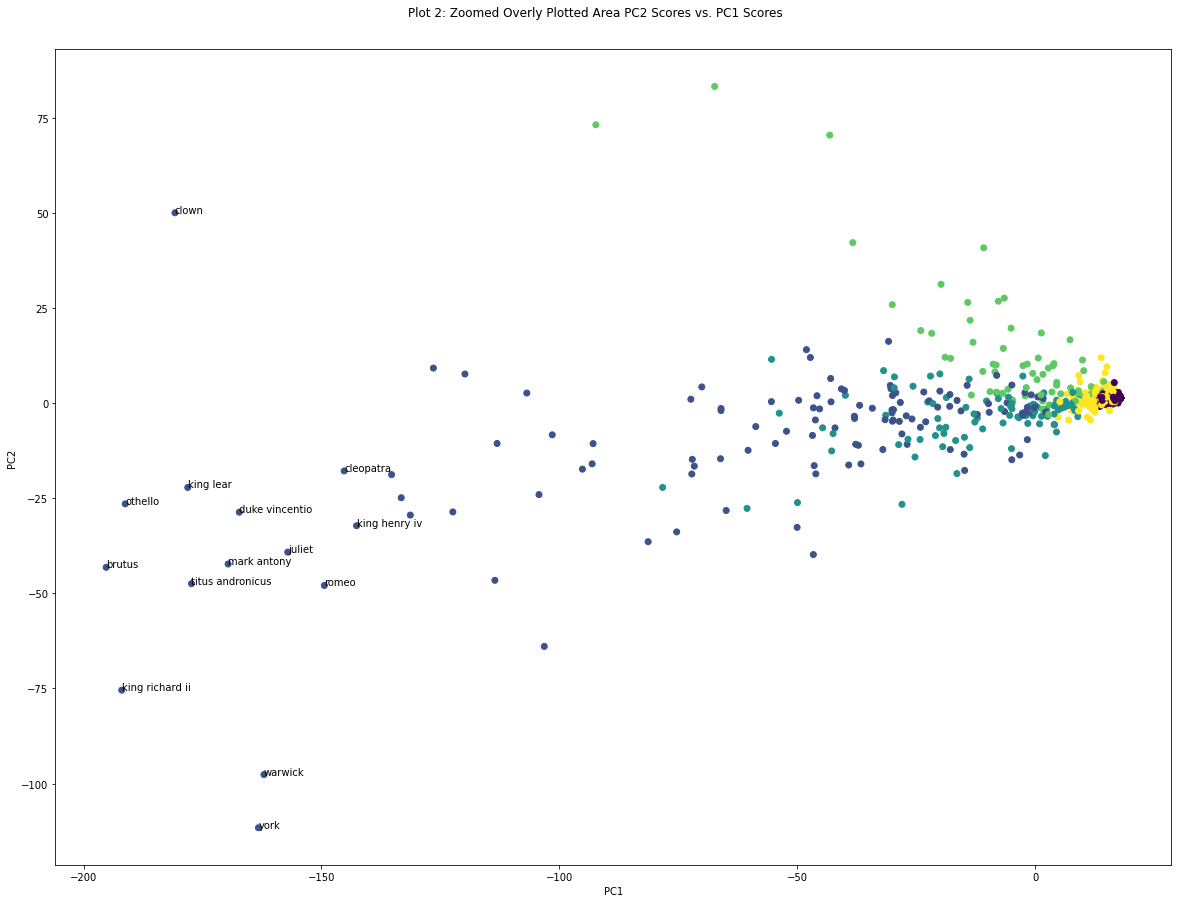

None

In [15]:
# plot 2: zoomed on the overly plotted area and focus on romeo and juliet
fig, ax = plt.subplots(1,1, figsize =(20, 15))

idx = np.logical_and(loadings[:, 0] > -200, loadings[:, 0] < 100)
Y = loadings[idx]
character_name = char_names[idx]
predict = predict_result[idx]

romeo_idx = np.logical_and(Y[:, 0] > -200, Y[:, 0] < -140)
romeo_loading = Y[romeo_idx]
romeo_like_name = character_name[romeo_idx]

# now plot the data
ax.scatter(Y[:,0], Y[:,1], c = predict)
fig.suptitle("Plot 2: Zoomed Overly Plotted Area PC2 Scores vs. PC1 Scores", y=.92)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

for i, txt in enumerate(romeo_like_name):
    ax.annotate(txt, (romeo_loading[i,0], romeo_loading[i,1]))
    
display(plt.show())

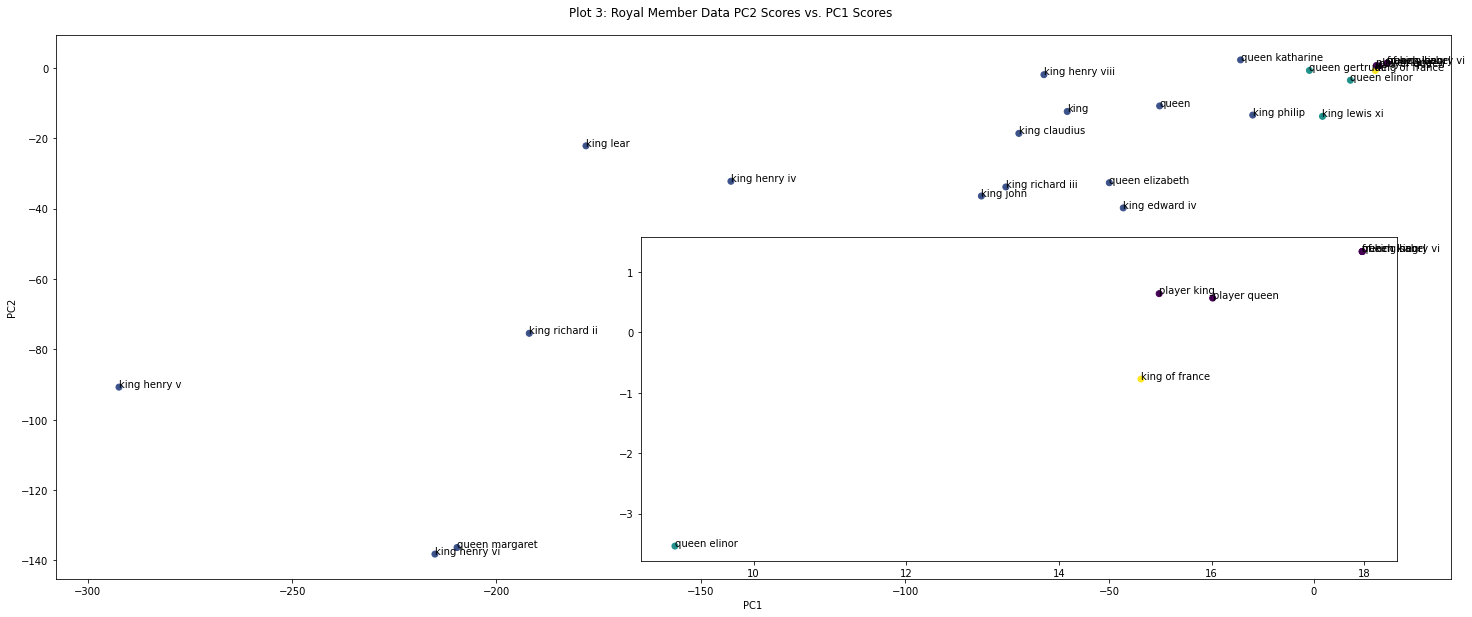

None

In [16]:
# plot 3: zoomed on the royal
queen_matching = [x for x in char_names if "queen" in x]
king_matching = [x for x in char_names if "king" in x]
king_matching = [x for x in king_matching if "buckingham" not in x]
# get the index of the kings and queens
queen_index = [np.where(char_names == x)[0][0] for x in queen_matching]
king_index = [np.where(char_names == x)[0][0] for x in king_matching]
# extract the data
royal = queen_index + king_index
royal_member = [char_names[x] for x in royal]
royal_loc = [loadings[x] for x in royal]
royal_type = [predict_result[x] for x in royal]

# Generate data for the zoomed portion
detail = np.logical_and(np.array(royal_loc)[:,0] > 5, np.array(royal_loc)[:,1] > -5)
detail_loading = np.array(royal_loc)[detail]
detail_name = np.array(royal_member)[detail]
detail_type = np.array(royal_type)[detail]

# plot the data
fig, ax = plt.subplots(1,1, figsize =(25, 10))

scatter = ax.scatter(np.array(royal_loc)[:,0], np.array(royal_loc)[:,1], c = np.array(royal_type))
fig.suptitle("Plot 3: Royal Member Data PC2 Scores vs. PC1 Scores", y=.92)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

for i, txt in enumerate(royal_member):
    ax.annotate(txt, (np.array(royal_loc)[i,0], np.array(royal_loc)[i,1]))

# location for the zoomed portion 
sub_axes = plt.axes([.45, .15, .42, .45]) 

# plot the zoomed portion
sub_axes.scatter(detail_loading[:,0], detail_loading[:,1], c = detail_type)
for i, txt in enumerate(detail_name):
    sub_axes.annotate(txt, (detail_loading[i,0], detail_loading[i,1]))
    
display(plt.show())

##### Grading Feedback Cell


Your insight explanation here: 
<br>
<b> The result of cluster assignment will change in each time running. Therefore, this explanation only corresponds to the output presented above. </b> 
<br><br>
For plot 1, it shows the distribution of all the plots. Given that those dots have been assigned to 5 different clusters, one can see that there are 5 different colors in the plot. One obvious pattern is that dots that gathered closelly have same color. Dots that located at the left side are "navy blue", including the annotatted outliers (such as "falstaff" and "hemlet"). The overly plotted area, which is located at the right side of the plot, have the other 4 colors, including "grass green", "ocean green", "yellow", and "purple". 
<br><br>
For plot 2, it shows the zoomed version of the overly plotted area of plot 1. Combining with the result obtained in the first plot, it seems that most of the dots are assigned to the "nany blue" cluster. The next cluster that has the second largest number of dots is "ocean green". "Grass Green" cluster and "Yellow" clsuter should be ranked thrid and fouth respectively. The last one is "Purple" cluster which contains only a few dots. It is interesting to find out that the "Ocean Green" clsuter is mixed with "Grass Green" and "Navy Blue" clusters. Considering that the kmean is using the distance beween dots as the evidence for cluster asisgnment, some of the "Ocean Green" dots that are away from the main cluster should be assigned to "Ocean Green" or "Navy Blue" cluster. Therefore, those distinct "Ocean Green" dots should have some unique features that are significant enough for the algorithmn to recognize them as being "Ocean Green". 
<br><br>
For plot 3, all the kings' and queens' dots have been extracted and plotted. Compared with kings' dots, one can see that most of the queens gathered at the right upper corner of the plot (except queen margaret). The distribution of kings are sparse. However, most of the kings have been assigned to the same cluster. On the contrary, queens have been assigned to different clsuters respectively. For example, "queen elizabeth", "queen katharine", and "queen margaret" have been assigned to the "Navy Blue" clsuter while "queen elinor", "queen", and "player queen" have been assigned to another two different cluster respectively. It is also interesting to find that "king henry vi" and "of king henry vi" almost overlapped with each other.

##### Grading Feedback Cell